# Explorative Datenanalyse

Im fogenden Notebook ist die explorative Datenanalyse von den 11'760 SRF Artikeln zu 12 unterschielichen Nachnamen.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Funktionen

In [112]:
# Gruppieren und zählen
def info_categories(categorie: str, top_cat: int=10):
    counts = data[categorie].value_counts().sort_index()
    

    distinct_count = data['Unterkategorie'].nunique()
    print(f"Distinct count of {categorie}: {distinct_count}\n\n{counts.sort_values(ascending=False)[:top_cat]}\n")



def plot_articles_per_cat(data: pd.DataFrame, categorie: str):
    # Filter für Sportartikel
    cat_data = data[data['Kategorie'] == categorie]

    # Gruppieren nach Suchbegriff und Zählen der Artikel
    cat_counts = cat_data['Suchbegriff'].value_counts()

    # Balkendiagramm erstellen
    cat_counts.plot(kind='bar', figsize=(12, 6), title=f'Anzahl der {categorie}-Artikel je Suchbegriff')
    plt.xlabel('Suchbegriff')
    plt.ylabel('Anzahl der Artikel')
    # Summe der Ziffern oberhalb der Balken anzeigen
    for index, value in enumerate(cat_counts):
        plt.text(index, value + 5, str(value), ha='center', va='bottom')



def plot_cat_per_term(data, search_term):
    # Daten für den Suchbegriff filtern
    filtered_data = data[data['Suchbegriff'] == search_term]

    # Kategorien zählen (Top 5)
    categories = filtered_data['Kategorie'].value_counts().head(5)

    # Balkendiagramm erstellen
    ax = categories.plot(kind='bar', figsize=(12, 6), title=f'Kategorien für {search_term}')

    # Summe der Ziffern oberhalb der Balken anzeigen
    for index, value in enumerate(categories):
        ax.text(index, value + 0.5, str(value), ha='center', va='bottom')

    plt.xlabel('Kategorie')
    plt.ylabel('Anzahl der Artikel')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



def plot_cat_per_term_grid(data, search_terms):
    fig, axes = plt.subplots(4, 3, figsize=(20, 16))
    axes = axes.flatten()

    for i, term in enumerate(search_terms):
        ax = axes[i]
        filtered_data = data[data['Suchbegriff'] == term]
        categories = filtered_data['Kategorie'].value_counts().head(5)
        categories.plot(kind='bar', ax=ax, title=f'Kategorien für {term}')

        for idx, value in enumerate(categories):
            ax.text(idx, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

        # y-label nur für die linke Spalte
        if i % 3 == 0:
            ax.set_ylabel('Anzahl Artikel')
        else:
            ax.set_ylabel('')

        # x-label nur für die unterste Zeile
        if i // 3 == 3:
            ax.set_xlabel('Kategorie')
        else:
            ax.set_xlabel('')

        ax.tick_params(axis='x', labelrotation=45)

    # Leere Plots ausblenden, falls weniger als 12 Begriffe
    for j in range(len(search_terms), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Top 5 Kategorien je Suchbegriff", fontsize=22, y=1.02)
    plt.tight_layout()
    plt.show()


## Daten einlesen

In [57]:
data = pd.read_csv('../output/df_namen.csv')
data

,Suchbegriff,Titel,Datum,Autor,Kategorie,Unterkategorie
0,Torres,Wechsel von Torres zu Barcelona fix – Mbabu fe...,"28.12.2021, 14:05 Uhr",Unbekannt,Sport,Fussball
1,Torres,Aegerter verpasst das Wunder – Gesamtsieg an T...,"11.10.2020, 14:28 Uhr",Unbekannt,Sport,Motorsport
2,Torres,Honorar von Dufry-Präsident Torres Carretero g...,"30.07.2019, 18:55 Uhr",Lorenzo Bonati,News,Wirtschaft
3,Torres,Torres kündigt Rücktritt an,"20.06.2019, 19:00 Uhr",Unbekannt,Sport,Fussball
4,Torres,Iniesta und Torres sagen «Adios»,"20.05.2018, 22:03 Uhr",Unbekannt,Sport,Fussball
...,...,...,...,...,...,...
11755,Luder,So will die Stadt Luzern ihr Parkplatzproblem ...,"19.05.2020, 10:00 Uhr",Unbekannt,News,News
11756,Luder,Luzerner Kantonsrat verlangt Transparenz über ...,"18.05.2020, 16:18 Uhr",Unbekannt,News,News
11757,Luder,Luzerner Kantonsparlament verschiebt Corona-De...,"17.05.2020, 15:08 Uhr",Unbekannt,News,News
11758,Luder,Luzern trainiert bereits am 18. Mai wieder,"16.05.2020, 11:30 Uhr",Unbekannt,Sport,Fussball


# grober Überblick

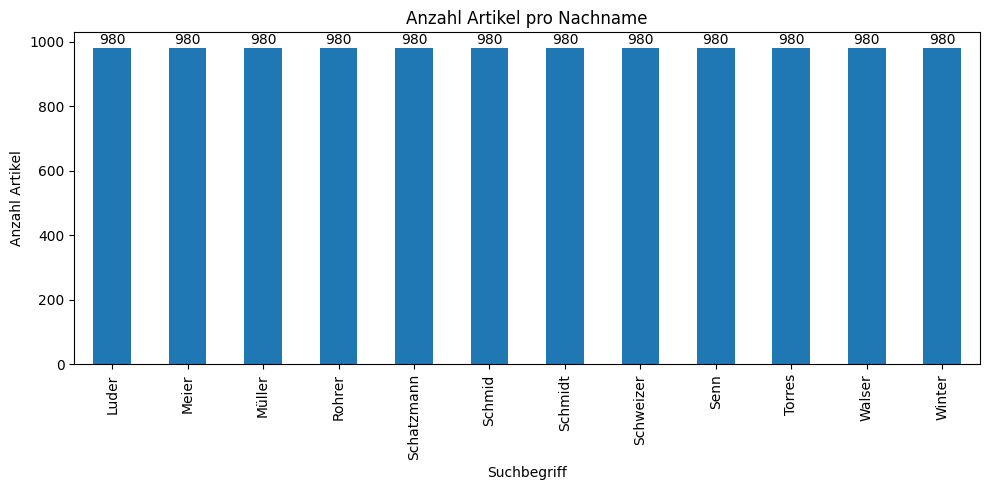

In [ ]:
# visueller doppelcheck, dass es pro Nachnamen 980 Artikel gibt

plt.figure(figsize=(10, 5))
data['Suchbegriff'].value_counts().sort_index().plot(kind='bar')
# Anzahl der Artikel oberhalb der Balken anzeigen
for index, value in enumerate(data['Suchbegriff'].value_counts().sort_index()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Anzahl Artikel pro Nachname')
plt.tight_layout()
plt.show()

In [ ]:
# Anzahl Artikel je Kategorie über das gesamte df
info_categories("Kategorie")

info_categories('Unterkategorie')

Distinct count of Kategorie: 159

Kategorie
Sport                   4476
News                    4366
Kultur                  1157
Radio SRF 3              236
Glanz & Gloria           204
Wissen                   193
Radio SRF 1              171
Radio SRF Musikwelle     146
Kassensturz Espresso     142
Meteo                    124
Name: count, dtype: int64

Distinct count of Unterkategorie: 159

Unterkategorie
News                       1821
Fussball                   1705
Schweiz                    1377
Mehr Sport                 1229
Eishockey                  1089
International               755
Film & Serien               437
Wirtschaft                  297
Gesellschaft & Religion     250
Glanz & Gloria              191
Name: count, dtype: int64



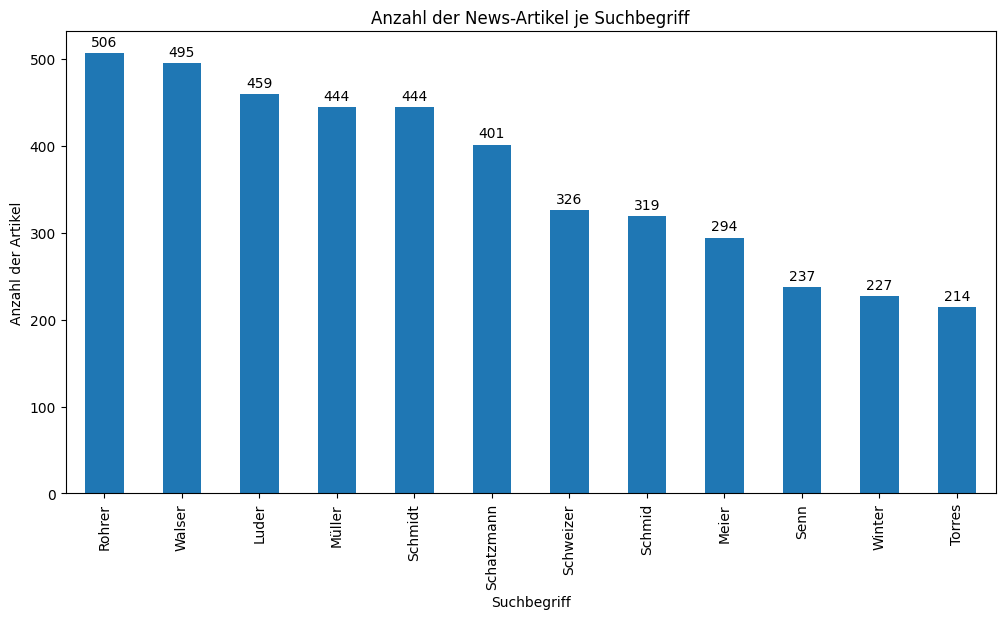

In [ ]:
# für eine beliebige Kategorie die Anzahl Artikel je Nachnamen
plot_articles_per_cat(data, "News")

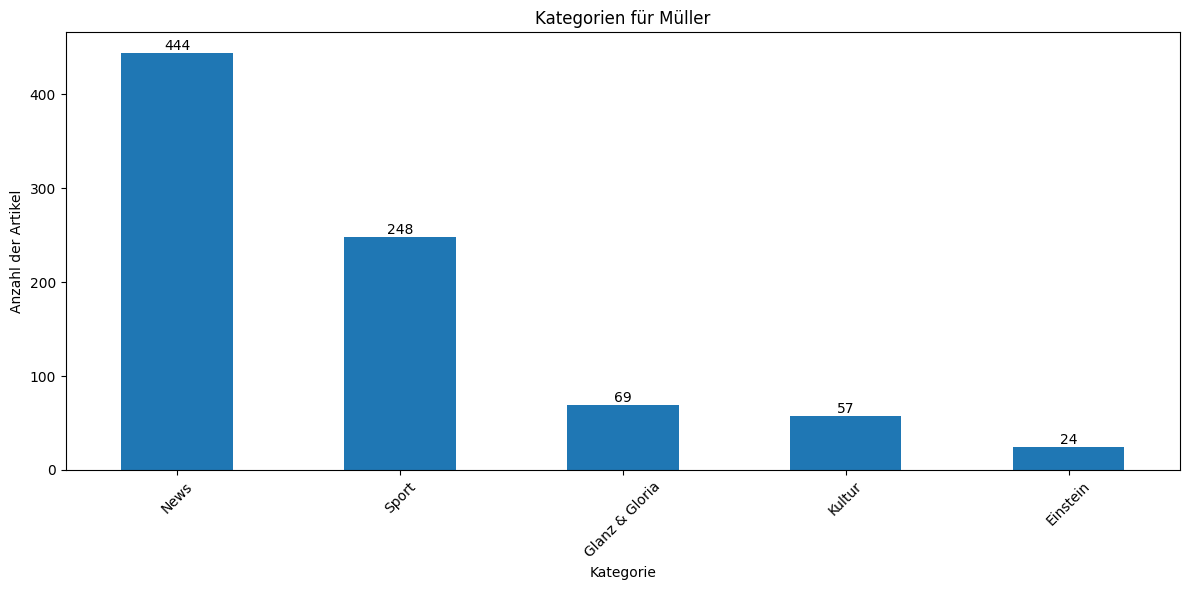

In [ ]:
# Für beliebigen Nachnamen die top 5 Kategorien
plot_cat_per_term(data, "Müller")

C:\Users\Sandra\AppData\Local\Temp\ipykernel_24488\3848510334.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


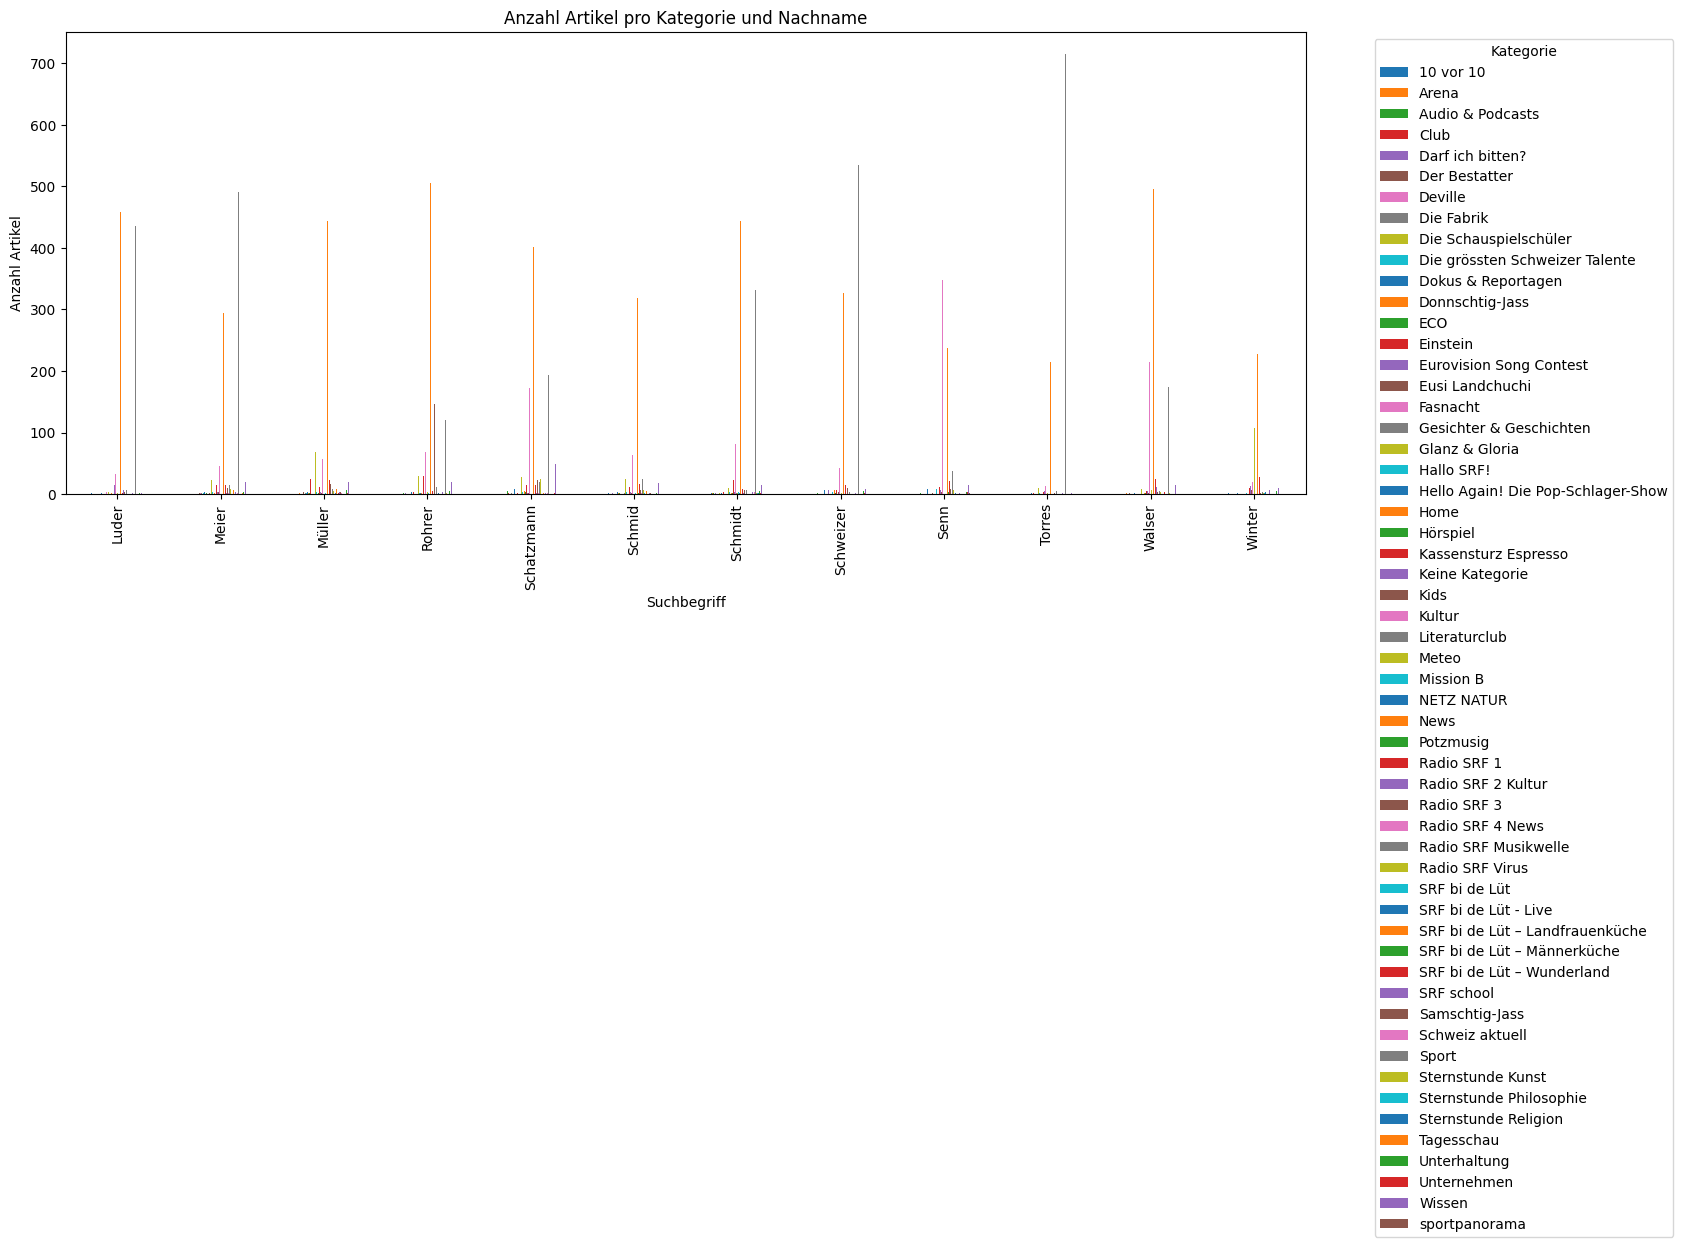

In [ ]:
# isch trash, han en gliich drin gloh zum zeige, dassi de gmacht han und ggf chunt der en idee, wie besser mache
category_counts = data.groupby(['Suchbegriff', 'Kategorie']).size().unstack(fill_value=0)
category_counts.plot(kind='bar', figsize=(16, 6))
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Anzahl Artikel pro Kategorie und Nachname')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


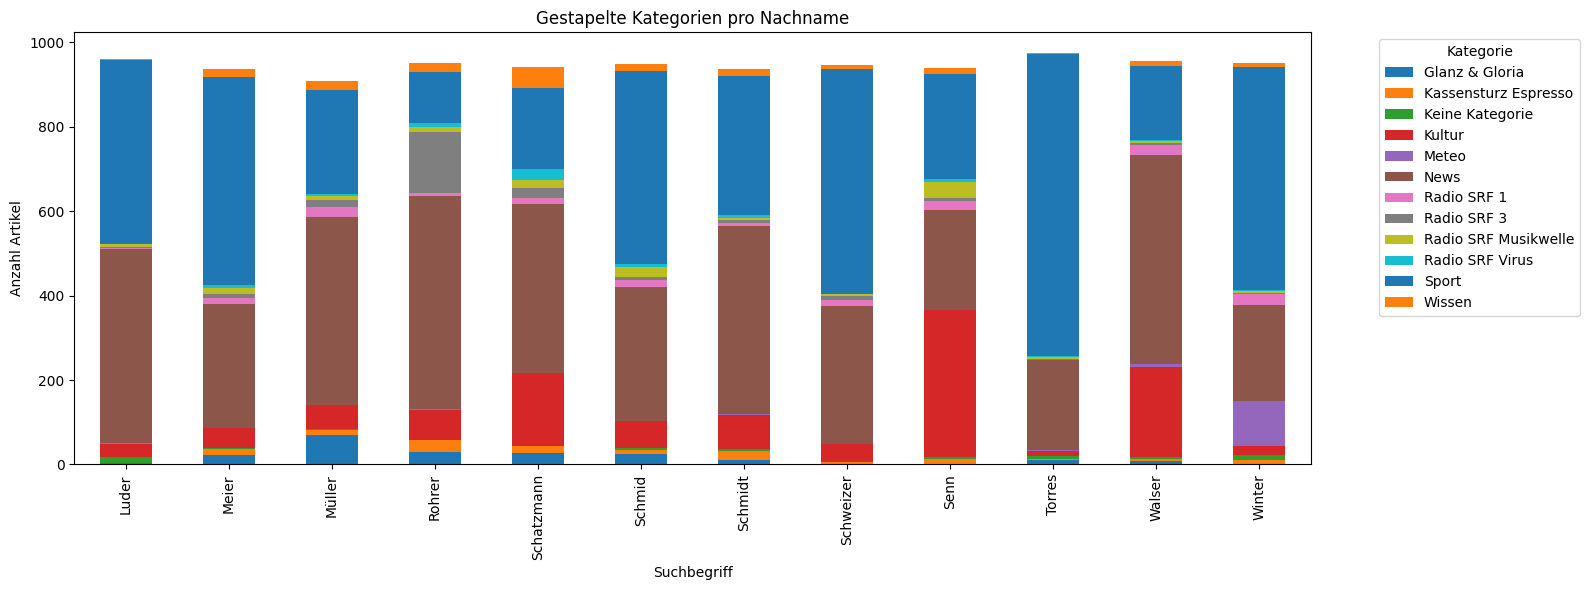

In [ ]:
# für alle Nachnamen die Kategorien von denen es mehr wie 50 Artikel gibt anzeigen
filtered_category_counts = category_counts.loc[:, category_counts.sum() >50]
filtered_category_counts.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Gestapelte Kategorien pro Nachname')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

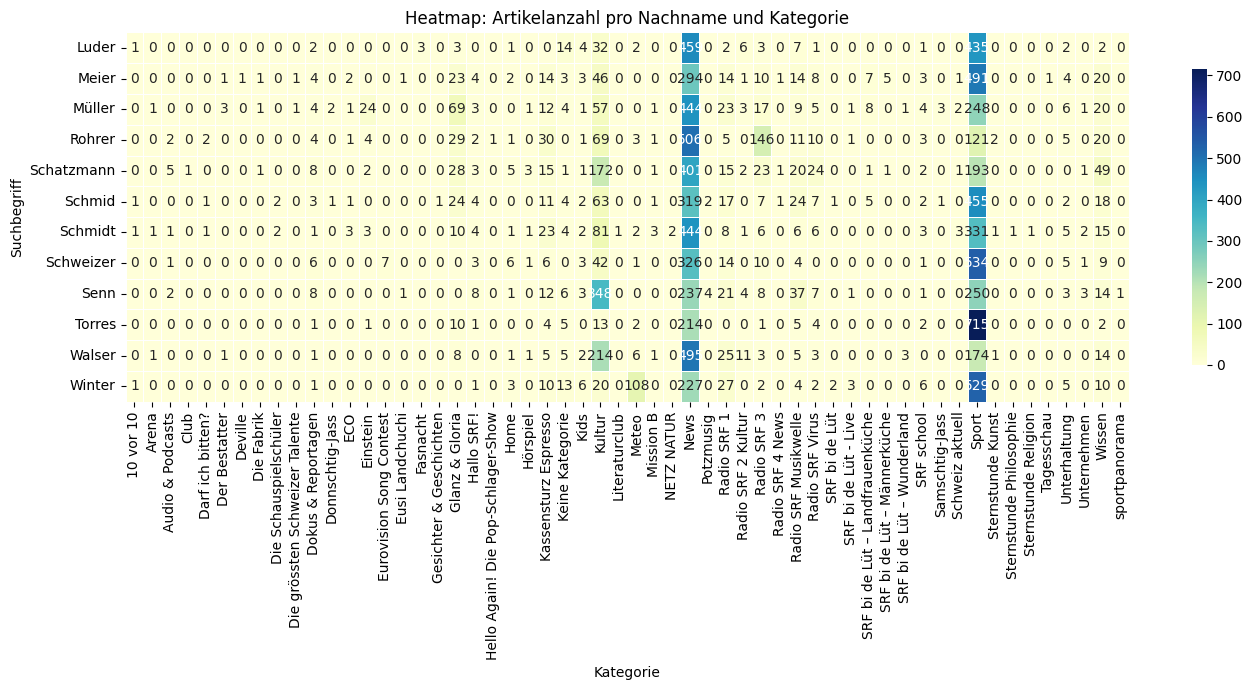

In [126]:
plt.figure(figsize=(14, 7))
sns.heatmap(category_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xlabel('Kategorie')
plt.ylabel('Suchbegriff')
plt.title('Heatmap: Artikelanzahl pro Nachname und Kategorie')
plt.tight_layout()
plt.show()


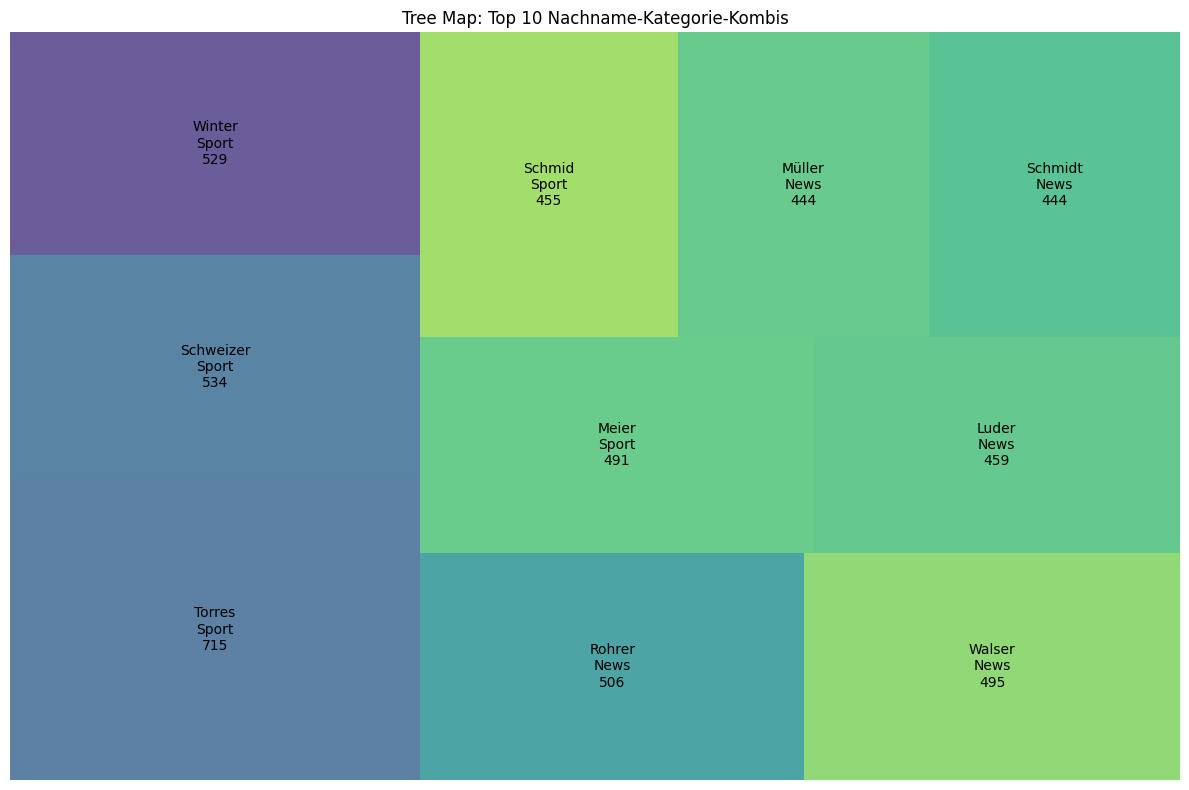

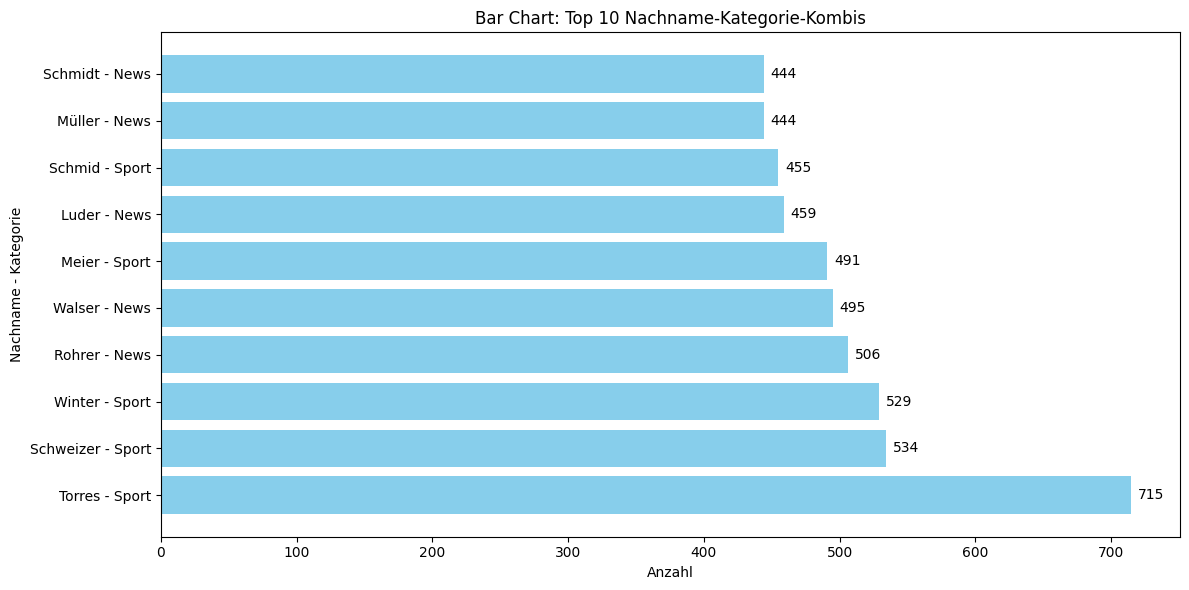

In [156]:
import squarify

# Top 10 Kombinationen für Übersichtlichkeit
top_combos = data.groupby(['Suchbegriff', 'Kategorie']).size().sort_values(ascending=False).head(10)
labels = [f"{i[0]}\n{i[1]}\n{v}" for i, v in top_combos.items()]
sizes = top_combos.values

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Tree Map: Top 10 Nachname-Kategorie-Kombis')
plt.axis('off')
plt.tight_layout()
plt.show()

# Bar chart for the same data
plt.figure(figsize=(12, 6))
bars = plt.barh([f"{i[0]} - {i[1]}" for i in top_combos.index], sizes, color='skyblue')
plt.xlabel('Anzahl')
plt.ylabel('Nachname - Kategorie')

# Anzahl der Artikel rechts neben den Bars anzeigen
for bar, size in zip(bars, sizes):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(size), va='center')
plt.title('Bar Chart: Top 10 Nachname-Kategorie-Kombis')
plt.tight_layout()
plt.show()


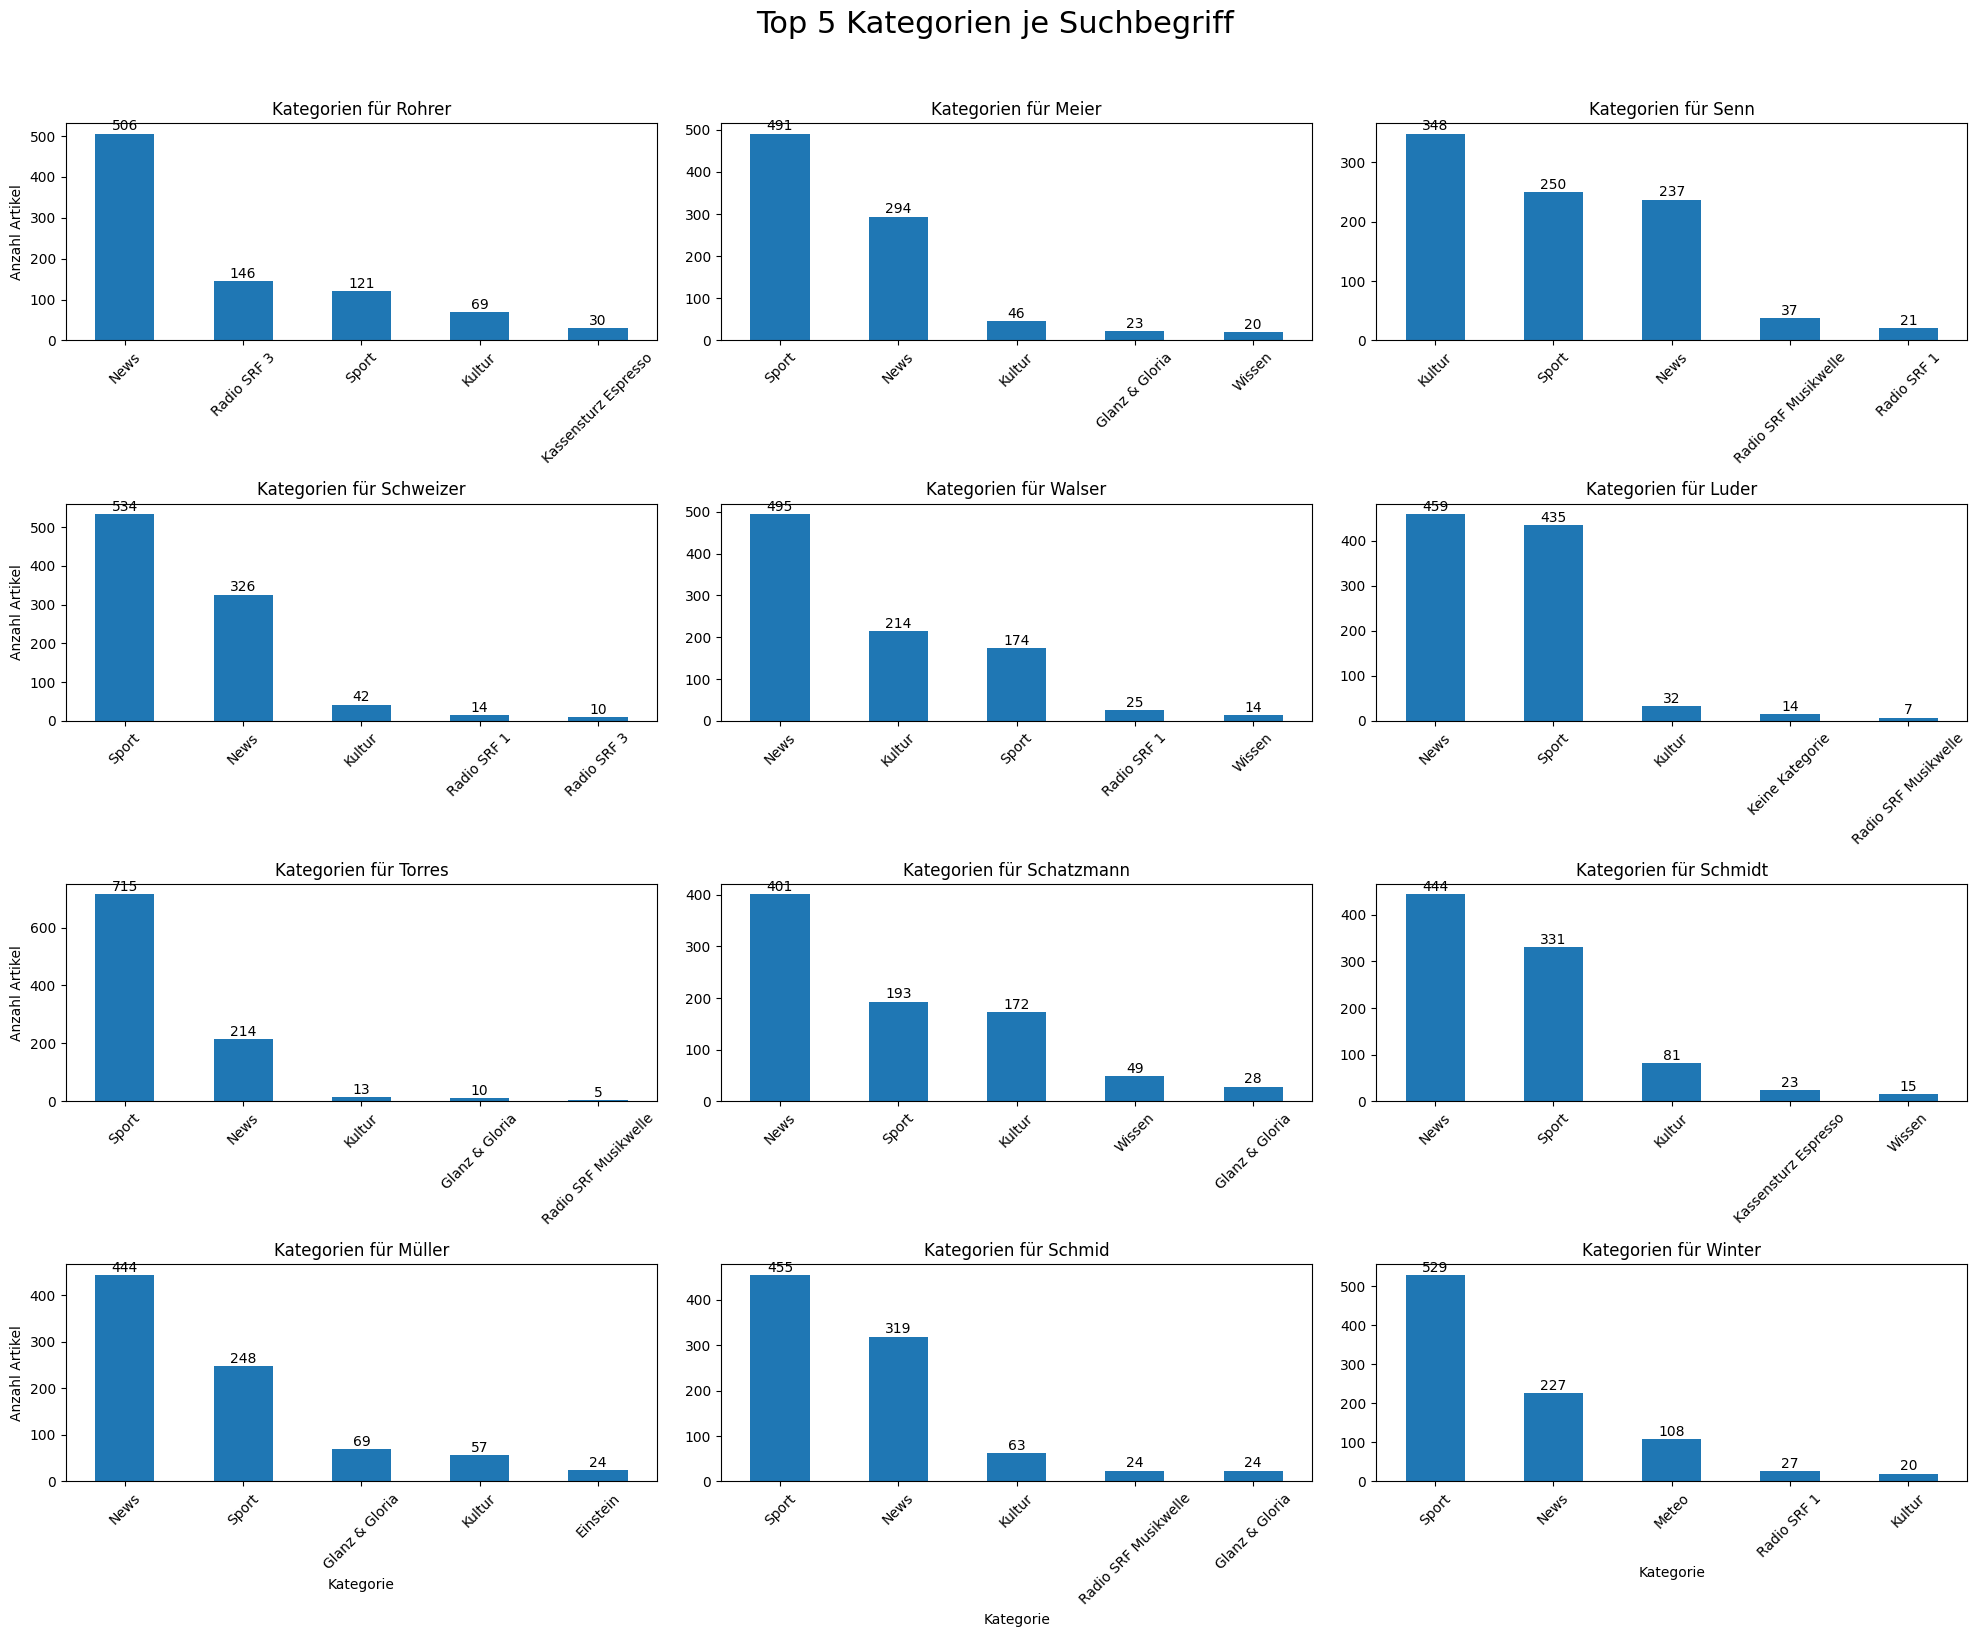

In [ ]:
# Beispiel-Aufruf:
suchbegriffe = [
    "Rohrer", "Meier", "Senn", 
    "Schweizer", "Walser", "Luder", 
    "Torres", "Schatzmann", "Schmidt",
    "Müller", "Schmid", "Winter"
]
plot_cat_per_term_grid(data, suchbegriffe)


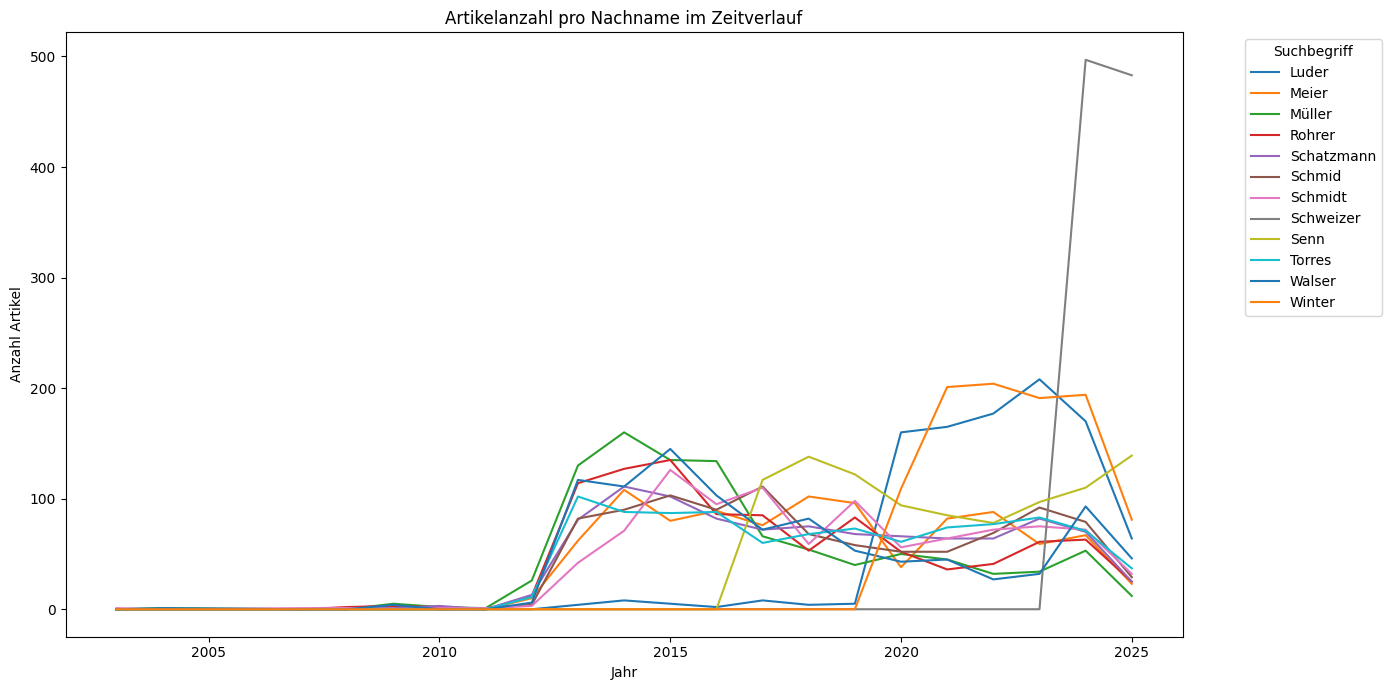

In [151]:
# Datum in ein Datetime-Objekt umwandeln
data['Datum_clean'] = pd.to_datetime(data['Datum'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y', errors='coerce')

# Nach Jahr gruppieren
data['Jahr'] = data['Datum_clean'].dt.year
yearly_counts = data.groupby(['Jahr', 'Suchbegriff']).size().unstack(fill_value=0)

yearly_counts.plot(figsize=(14, 7))
plt.xlabel('Jahr')
plt.ylabel('Anzahl Artikel')
plt.title('Artikelanzahl pro Nachname im Zeitverlauf')
plt.legend(title='Suchbegriff', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyse über die gereinigentn Daten

In [160]:
top_categories = data['Kategorie'].value_counts().head(10).index
data['Kategorie'] = data['Kategorie'].apply(lambda x: x if x in top_categories else 'Diverses')

In [161]:
data

,Suchbegriff,Titel,Datum,Autor,Kategorie,Unterkategorie,Datum_clean,Jahr
0,Torres,Wechsel von Torres zu Barcelona fix – Mbabu fe...,"28.12.2021, 14:05 Uhr",Unbekannt,Sport,Fussball,2021-12-28,2021
1,Torres,Aegerter verpasst das Wunder – Gesamtsieg an T...,"11.10.2020, 14:28 Uhr",Unbekannt,Sport,Motorsport,2020-10-11,2020
2,Torres,Honorar von Dufry-Präsident Torres Carretero g...,"30.07.2019, 18:55 Uhr",Lorenzo Bonati,News,Wirtschaft,2019-07-30,2019
3,Torres,Torres kündigt Rücktritt an,"20.06.2019, 19:00 Uhr",Unbekannt,Sport,Fussball,2019-06-20,2019
4,Torres,Iniesta und Torres sagen «Adios»,"20.05.2018, 22:03 Uhr",Unbekannt,Sport,Fussball,2018-05-20,2018
...,...,...,...,...,...,...,...,...
11755,Luder,So will die Stadt Luzern ihr Parkplatzproblem ...,"19.05.2020, 10:00 Uhr",Unbekannt,News,News,2020-05-19,2020
11756,Luder,Luzerner Kantonsrat verlangt Transparenz über ...,"18.05.2020, 16:18 Uhr",Unbekannt,News,News,2020-05-18,2020
11757,Luder,Luzerner Kantonsparlament verschiebt Corona-De...,"17.05.2020, 15:08 Uhr",Unbekannt,News,News,2020-05-17,2020
11758,Luder,Luzern trainiert bereits am 18. Mai wieder,"16.05.2020, 11:30 Uhr",Unbekannt,Sport,Fussball,2020-05-16,2020


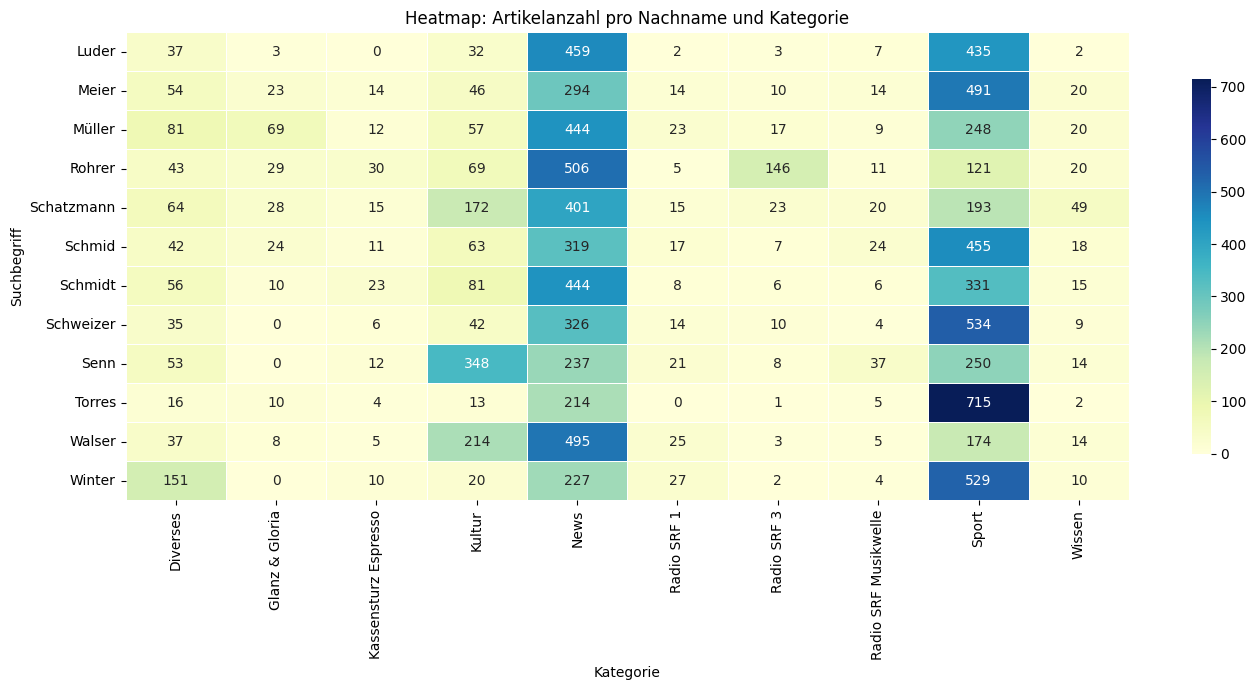

In [162]:
category_counts = data.groupby(['Suchbegriff', 'Kategorie']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 7))
sns.heatmap(category_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.xlabel('Kategorie')
plt.ylabel('Suchbegriff')
plt.title('Heatmap: Artikelanzahl pro Nachname und Kategorie')
plt.tight_layout()
plt.show()